# Lab 1: Data Loading, Summary, and Visualization

### 1. Create Dataframe

In [1]:
import numpy
import pandas
myarray = numpy.array([[1,2,3],[4,5,6]])
rownames = ['a','b']
colnames=['f1','f2','f3']
mydataframe = pandas.DataFrame(myarray, index = rownames, columns=colnames)
print(mydataframe)

   f1  f2  f3
a   1   2   3
b   4   5   6


### Change the type of data

In [2]:
import numpy
import pandas
myarray = numpy.array([['a','sandhya',9.6],[4,'shreya',6.5]])
rownames = ['r1','r2']
colnames=['f1','f2','f3']
mydataframe = pandas.DataFrame(myarray, index = rownames, columns=colnames)
print(mydataframe)

   f1       f2   f3
r1  a  sandhya  9.6
r2  4   shreya  6.5


### 2. Load csv file using pandas from a specific path or url 
### Copy dataset given in https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv to your local folder.

In [3]:
from pandas import read_csv
path='covid_19_data.csv'
data=read_csv(path)
print (data.shape) #to know size of the data

(306429, 8)


In [4]:
from pandas import read_csv
url='https://gist.githubusercontent.com/manavpatadia/72b462bc1fdd16fa9aa4aac2bd5ebfb6/raw/ed3b18bda80f53f071b5d3b681f6c04a4fb62128/covid_19_data.csv'
data=read_csv(url)
colnames=['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']
data

SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0        0.0  
2           1/22/2020 17:00        6.0     0.0        0.0  
3           1/22/2020 17:00        1.0     0.0        0.0  
4           1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0  

[306429 rows x 8 columns]

### 3. To get statistical summary of the data

#### a. Get the data statistics

In [5]:
description = data.describe()
print(description)

                 SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.567091e+04    2036.403268  5.042029e+04
std     88458.577156  2.775516e+05    6410.938048  2.015124e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     76608.000000  1.042000e+03      13.000000  1.100000e+01
50%    153215.000000  1.037500e+04     192.000000  1.751000e+03
75%    229822.000000  5.075200e+04    1322.000000  2.027000e+04
max    306429.000000  5.863138e+06  112385.000000  6.399531e+06


### Here 25%, 50%, gives % of data that falls below a given corresponding value in each column.

#### b. Size of matrix

In [6]:
print(data.shape)

(306429, 8)


#### c. Peek at data/ used to get the first n rows

In [7]:
print(data.head(4))

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  


#### d. Group on the basis of a particular attribute

In [8]:
print(data.groupby('Country/Region').size())

Country/Region
 Azerbaijan                         1
('St. Martin',)                     1
Afghanistan                       461
Albania                           447
Algeria                           460
                                 ... 
West Bank and Gaza                430
Yemen                             415
Zambia                            438
Zimbabwe                          436
occupied Palestinian territory      7
Length: 229, dtype: int64


### 4. Data visualization
#### For plotting pairs of attributes as scattered plot, specify the attributes to be plotted explicitly

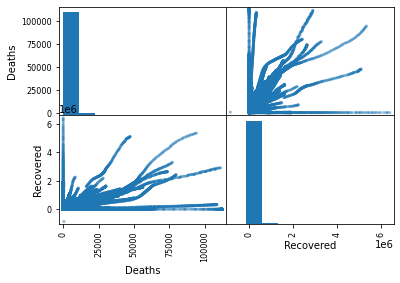

In [9]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Deaths','Recovered']])
plt.show()

#### For plotting all pairs of attributes in data

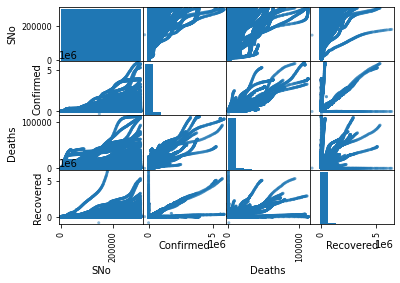

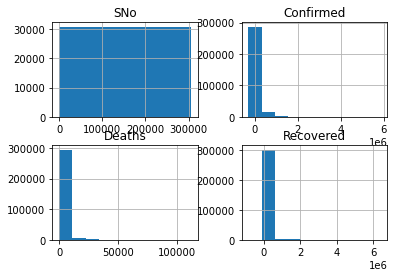

In [10]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(data) #scatter plot
plt.show()
data.hist() #histogram
plt.show()

### 5. Standardization of dataset

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
arr=data.values #convert data frame to array
X=arr[:,5:7] #split columns
Y=arr[:,7]
scaler=StandardScaler().fit(X) #fit data for standardization
rescaledX=scaler.transform(X) #convert the data as per (x-μ)/σ
numpy.set_printoptions(precision=3)
print(rescaledX[0:2,:])
print(X[0:2,:])

[[-0.309 -0.318]
 [-0.309 -0.318]]
[[1.0 0.0]
 [14.0 0.0]]


### 6. Normalizing a column in pandas
#### Create the dataframe

#### Plot normalized data

In [14]:
from sklearn import preprocessing
fl_x=X
#fl_x=mydataframe[['f1']].values.astype(float) #If specific feature name is to be converted
min_max_scaler=preprocessing.MinMaxScaler()
X_scaled=min_max_scaler.fit_transform(fl_x)
df_normalized=pandas.DataFrame(X_scaled)
print(df_normalized)

               0         1
0       0.049115  0.001581
1       0.049118  0.001581
2       0.049116  0.001581
3       0.049115  0.001581
4       0.049115  0.001581
...          ...       ...
306424  0.065762  0.022325
306425  0.053842  0.003758
306426  0.049337  0.001590
306427  0.063314  0.017022
306428  0.112618  0.039356

[306429 rows x 2 columns]


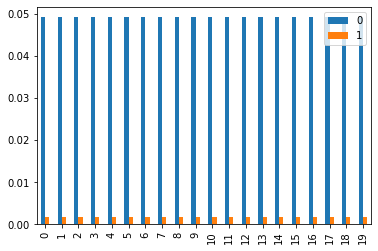

In [17]:
df_normalized[0:20].plot(kind='bar')
plt.show()

### Identify the difference in the standardization and normalization of data.

______________________________________________________________________________________________________________________________________

##### ***Normalization*** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
##### ***Standardization*** is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
______________________________________________________________________________________________________________________________________

##### ***Formula for Normalization*** = (X-Xmin) / (Xmax-Xmin)
##### Xmax and Xmin are the maximum and the minimum values of the feature respectively.
##### ***Formula for Standardization*** = (X-μ) / (σ)
##### μ is the mean of the feature values and σ is the standard deviation of the feature values
______________________________________________________________________________________________________________________________________
##### ***Normalization*** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
##### ***Standardization***, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
______________________________________________________________________________________________________________________________________